In [13]:
%matplotlib inline

In [3]:
from path_finder import BFS
from graph_generator import read_input_file
from matplotlib import pyplot as plt
import time
from IPython.display import display

Read from file....
Width=22, Height=18
Start: (2, 2)
Goal: (19, 16)
Found 3 Polygons
Done load input


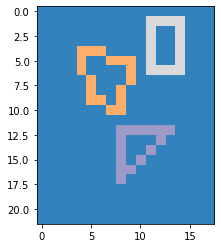

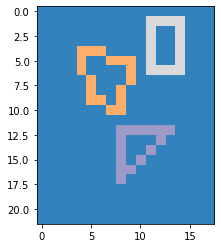

In [16]:

input_path = 'sample_input.txt'
matrix, start, goal = read_input_file(input_path, True)
plt.imshow(matrix, cmap="tab20c")


Found path


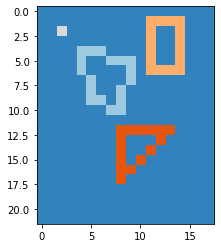

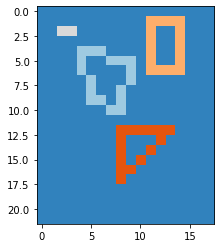

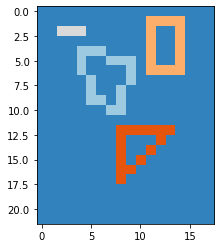

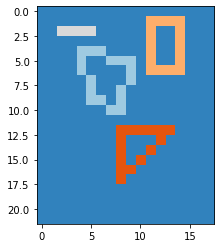

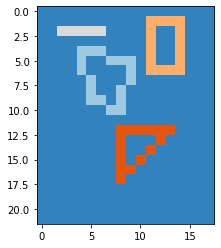

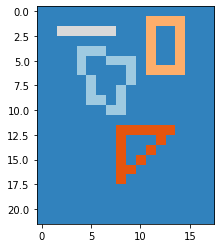

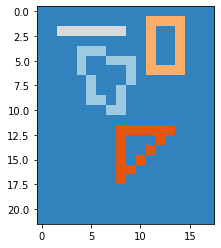

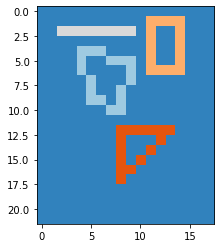

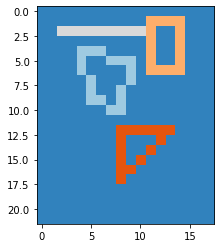

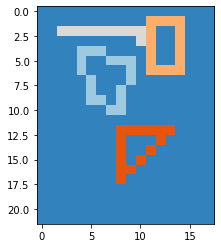

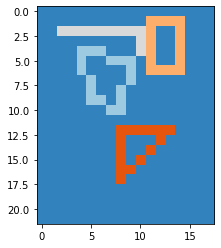

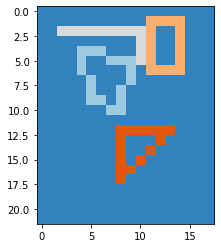

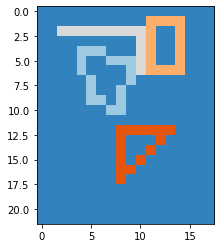

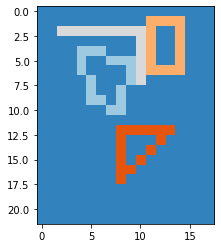

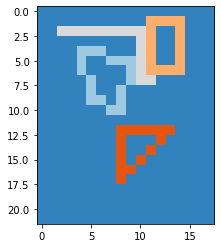

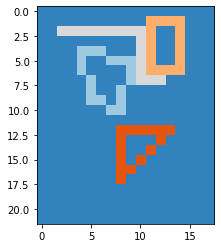

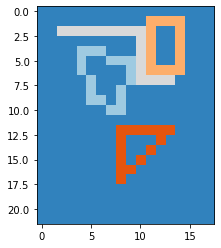

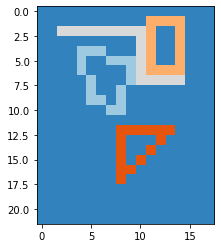

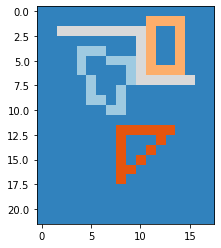

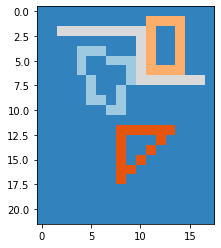

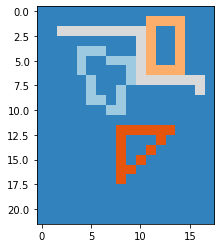

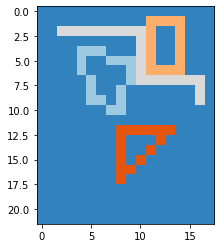

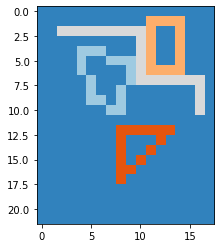

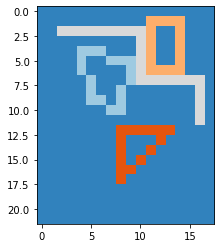

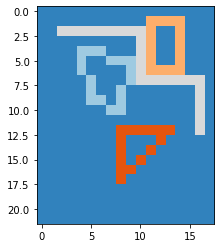

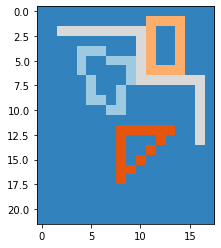

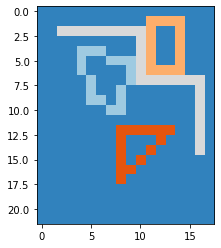

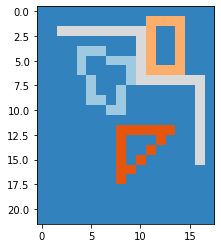

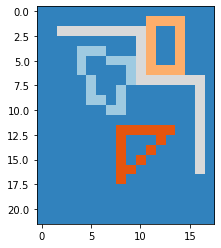

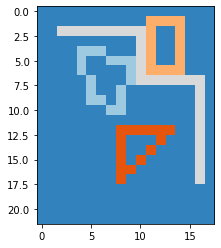

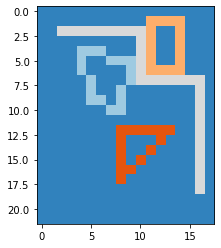

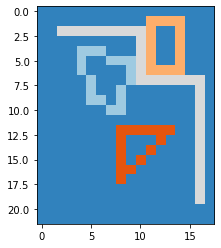

In [17]:
path_finder = BFS(start, goal)
path = path_finder.search(matrix)
fig = plt.figure()
fig.canvas.draw()
PATH_VALUE = 9
if path:
    print("Found path")
    for pos in path:
        matrix[pos] = PATH_VALUE
        plt.imshow(matrix, cmap="tab20c")
        fig.canvas.draw()
        plt.pause(0.5)
        plt.show()
else:
    print("Not found path")
